In [2]:
import diplib as dip
from PIL import Image
import math
import imutils
import cv2
import numpy as np
import glob

In [21]:
for i, img_bmp in enumerate(glob.glob('data_org/*.bmp')):
    img_cv2 = cv2.imread(img_bmp)
    cv2.imwrite('data_org/%s.tiff'%i, img_cv2)

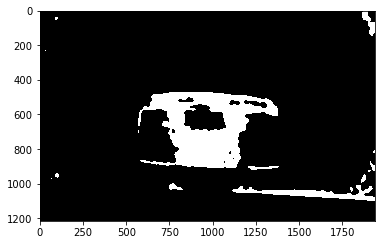

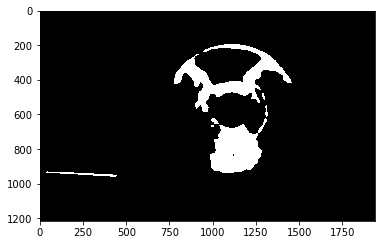

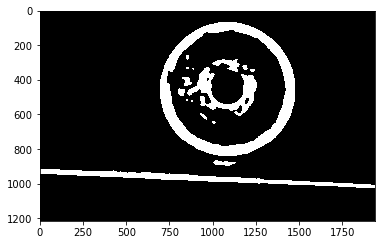

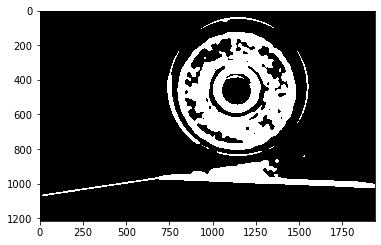

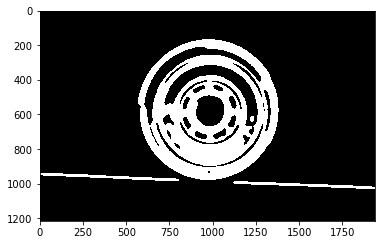

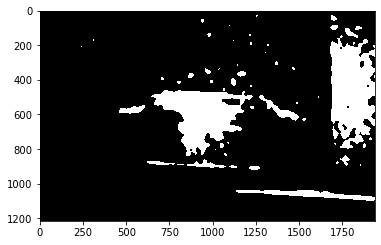

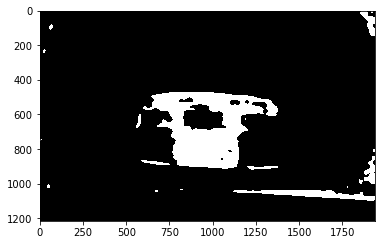

In [28]:
for img_tiff in glob.glob('data_org/*.tiff'):
    img = dip.ImageReadTIFF(img_tiff)
    img.SetPixelSize(dip.PixelSize(1 * dip.Units("mm")))
    obj = dip.Canny(img(0), upper=0.99)
    obj_BF = dip.BilateralFilter(obj, spatialSigmas=10, tonalSigma=0)
    Threshold_obj = dip.Threshold(dip.Gauss(obj_BF))[0]
    Threshold_obj.Show()

In [29]:
def un_shadow(img):
    rgb_planes = cv2.split(img)
    result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_planes.append(diff_img)
        result_norm_planes.append(norm_img)
    result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    return result_norm

In [31]:
for i, img_bmp in enumerate(glob.glob('data_org/*.bmp')):
    img_cv2 = cv2.imread(img_bmp)
    img_cv2 = un_shadow(img_cv2)
    cv2.imwrite('data_org/wh_%s.tiff'%i, img_cv2)

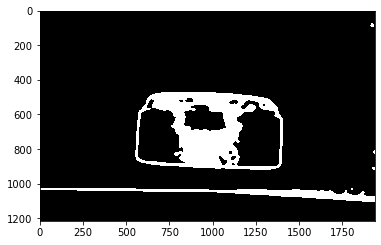

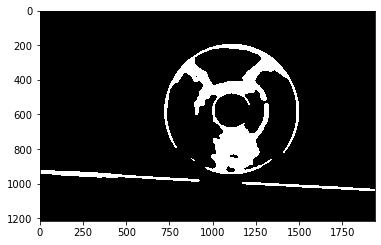

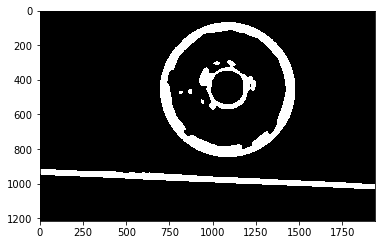

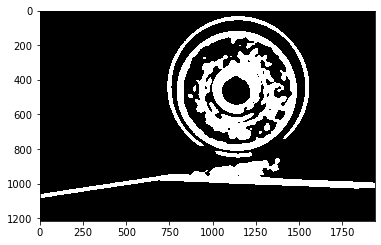

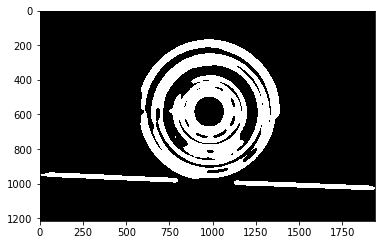

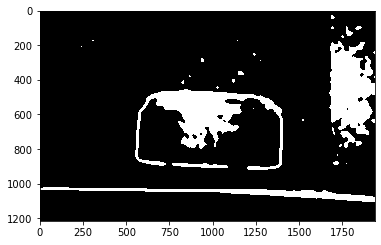

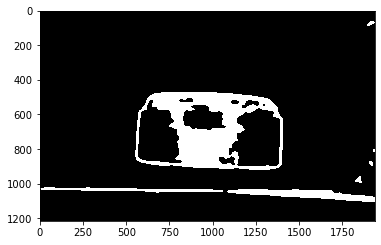

In [33]:
for img_tiff in glob.glob('data_org/wh_*.tiff'):
    img = dip.ImageReadTIFF(img_tiff)
    img.SetPixelSize(dip.PixelSize(1 * dip.Units("mm")))
    obj = dip.Canny(img(0), upper=0.99)
    obj_BF = dip.BilateralFilter(obj, spatialSigmas=10, tonalSigma=0)
    Threshold_obj = dip.Threshold(dip.Gauss(obj_BF))[0]
    Threshold_obj.Show()

In [18]:
def show_img(img):
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [143]:
image = cv2.imread("cam6.bmp")

img_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh_img = cv2.threshold(img_grey, 120, 255, cv2.THRESH_BINARY)
#show_img(thresh_img)

#edged = cv2.Canny(gray, 30, 200)
#show_img(edged)
        
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  
for c in contours:
    if cv2.contourArea(c) < 300:
        continue    
    cv2.drawContours(image, c, -1, (255, 255, 255), 3)

show_img(image)

In [16]:
'''
orig = cv2.imread("cam6.bmp")
show_img(orig)
img = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
cv2.GaussianBlur(img, (3,3), 0, img)
edges = cv2.Canny(img,10,20,apertureSize = 3)
show_img(edges)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = list(filter(lambda cont: cv2.arcLength(cont, False) > 60, contours))
blank = np.zeros((orig.shape[0],orig.shape[1],3), np.uint8)
cv2.drawContours(blank, contours,-1,(0,255,0),5)
show_img(blank)
edges = cv2.Canny(blank,10,20,apertureSize = 3)
show_img(edges)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
maxcontour=0
for cnt in contours:
    cv2.drawContours(img, cnt, 0, (255, 255, 0), 2)
    if cv2.contourArea(cnt)>5000:  
        hull = cv2.convexHull(cnt)    
        hull = cv2.approxPolyDP(hull,0.1*cv2.arcLength(hull,True),True)
        if len(hull)==4:
            cv2.drawContours(img,[hull],0,(0,255,0),2)
show_img(img)
'''

In [5]:
img = Image.open('wheel.bmp').convert('RGB')
img.save('wheel.tiff', format='tiff', compression=None)

In [112]:
img = cv2.imread('test_side.bmp', -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out_3.tiff', result)
cv2.imwrite('shadows_out_norm_3.tiff', result_norm)

True

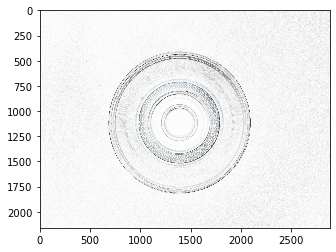

In [131]:
img = dip.ImageReadTIFF('shadows_out_norm.tiff')
img.SetPixelSize(dip.PixelSize(0.0556 * dip.Units("mm")))
#img.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1.1, "um")))
img.Show()

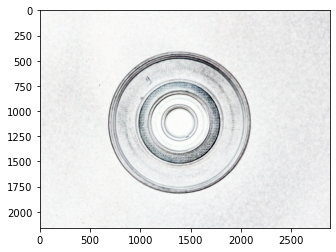

In [132]:
img_BF = dip.BilateralFilter(img, spatialSigmas=5, tonalSigma=0)
img_BF.Show()

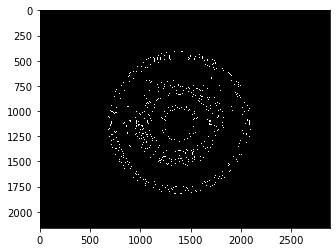

In [133]:
#obj1 = dip.Threshold(img_BF(0))[0]

#obj = dip.ColorSpaceManager.Convert(img_BF(0), 'gray')
#obj2 = dip.Canny(obj, upper=0.98)

obj3 = dip.Canny(img_BF(0), upper=0.99)


#obj1.Show()
#obj2.Show()
obj3.Show()

Scalar image:
    data type SFLOAT
    sizes {2880, 2160} (2D)
    pixel size 0.0556 mm x 0.0556 mm
    strides {1, 2880}, tensor stride 1
    data pointer:   000002D193EFE040 (shared among 1 images)
    origin pointer: 000002D193EFE040



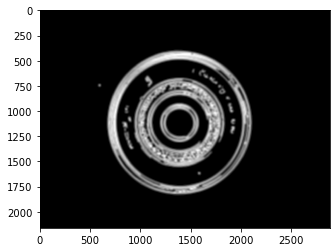

In [82]:
obj_BF = dip.BilateralFilter(obj3, spatialSigmas=10, tonalSigma=0)
print(obj_BF)
obj_BF.Show()

In [101]:
#bin_BF = obj_BF.Convert("BIN")

None


Scalar image:
    data type BIN
    sizes {2880, 2160} (2D)
    pixel size 0.0556 mm x 0.0556 mm
    strides {1, 2880}, tensor stride 1
    data pointer:   000002D188CC5040 (shared among 1 images)
    origin pointer: 000002D188CC5040



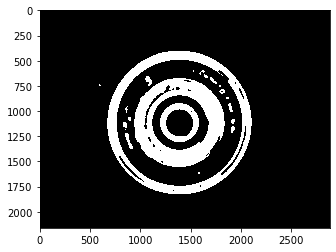

In [83]:
Threshold_obj = dip.Threshold(dip.Gauss(obj_BF))[0]
print(Threshold_obj)
Threshold_obj.Show()

Scalar image:
    data type UINT32
    sizes {2880, 2160} (2D)
    pixel size 0.0556 mm x 0.0556 mm
    strides {1, 2880}, tensor stride 1
    data pointer:   000002D192721040 (shared among 1 images)
    origin pointer: 000002D192721040



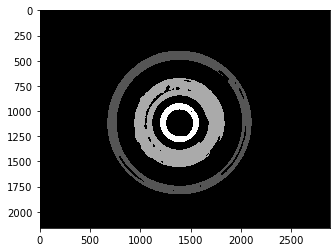

In [84]:
lab = dip.Label(Threshold_obj,minSize=5000)
print(lab)
lab.Show()

In [86]:
msr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
print(msr)

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      1093. |      249.5 |      39.92 |      39.70 |      39.50 |     0.1112 |     0.2204 |      4958. | 
2 |      1135. |      162.3 |      25.41 |      24.64 |      23.23 |     0.4702 |     0.5885 |      1928. | 
3 |      187.8 |      67.57 |      10.85 |      10.75 |      10.62 |    0.05206 |     0.5156 |      364.2 | 



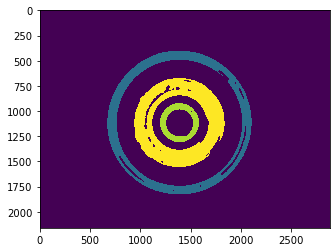

In [87]:
c = dip.ObjectToMeasurement(lab, msr['Solidity']) # 1-79.92/79.84 2-50.66/50.82 3-20.81/21.7
c.Show(colormap='viridis')

In [111]:
msr = dip.MeasurementTool.Measure(lab,img,["Feret"], [])
msr.FeatureValuesView( 1, 1 )

AttributeError: 'diplib.PyDIP_bin.MeasurementTool.Measurement' object has no attribute 'FeatureValuesView'

In [98]:
#dip.viewer.Show(lab)

In [99]:
#dip.viewer.CloseAll()

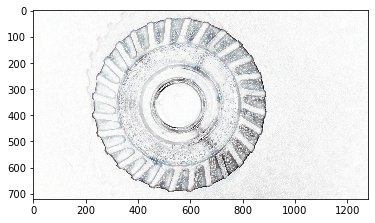

In [147]:
img = dip.ImageReadTIFF('shadows_out_norm_2.tiff')
img.SetPixelSize(dip.PixelSize(0.1125 * dip.Units("mm")))
#img.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1.1, "um")))
img.Show()

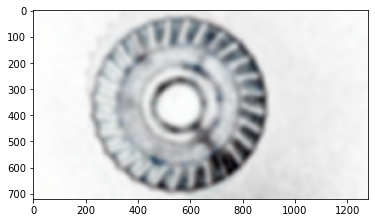

In [148]:
img_BF = dip.BilateralFilter(img, spatialSigmas=10, tonalSigma=0)
img_BF.Show()

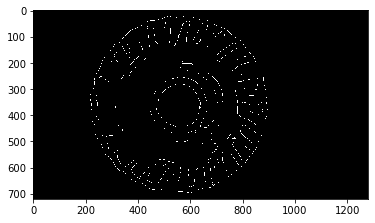

In [149]:
obj3 = dip.Canny(img_BF(0), upper=0.99)
obj3.Show()

Scalar image:
    data type SFLOAT
    sizes {1280, 720} (2D)
    pixel size 0.1125 mm x 0.1125 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   0000019F57329040 (shared among 1 images)
    origin pointer: 0000019F57329040



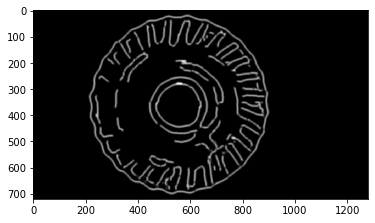

In [150]:
obj_BF = dip.BilateralFilter(obj3, spatialSigmas=3, tonalSigma=30)
print(obj_BF)
obj_BF.Show()

Scalar image:
    data type BIN
    sizes {1280, 720} (2D)
    pixel size 0.1125 mm x 0.1125 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   000002D182EF1F80 (shared among 1 images)
    origin pointer: 000002D182EF1F80



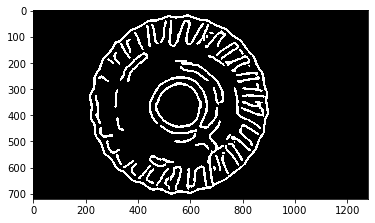

In [209]:
Threshold_obj = dip.Threshold(dip.Gauss(obj_BF))[0]
print(Threshold_obj)
Threshold_obj.Show()

Scalar image:
    data type UINT32
    sizes {1280, 720} (2D)
    pixel size 0.1125 mm x 0.1125 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   000002D18C230040 (shared among 1 images)
    origin pointer: 000002D18C230040



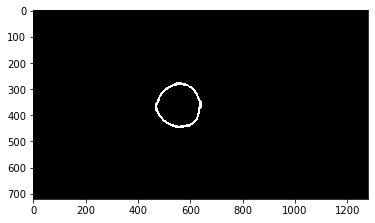

In [210]:
lab = dip.Label(Threshold_obj,minSize=4000, maxSize=4700)
print(lab)
lab.Show()

In [211]:
msr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
print(msr)

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      58.05 |      61.92 |      10.38 |      9.728 |      9.353 |     0.2617 |     0.1930 |      300.7 | 



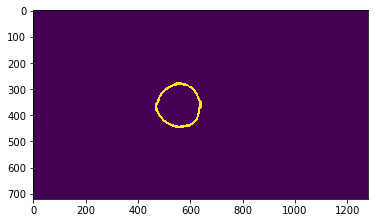

In [212]:
c = dip.ObjectToMeasurement(lab, msr['Solidity']) 
c.Show(colormap='viridis')

In [213]:
msr["Radius"][1][0] * 2

20.764286020073886

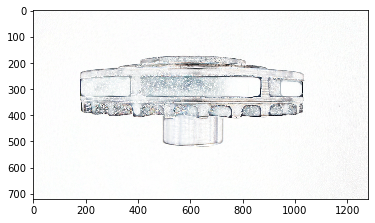

In [2]:
img = dip.ImageReadTIFF('shadows_out_norm_3.tiff')
img.SetPixelSize(dip.PixelSize(0.0556 * dip.Units("mm")))
#img.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1.1, "um")))
img.Show()

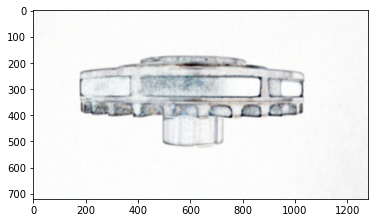

In [3]:
img_BF = dip.BilateralFilter(img, spatialSigmas=3, tonalSigma=0)
img_BF.Show()

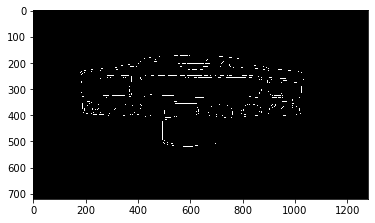

In [4]:
obj3 = dip.Canny(img_BF(0), upper=0.995)
obj3.Show()

Scalar image:
    data type SFLOAT
    sizes {1280, 720} (2D)
    pixel size 0.0556 mm x 0.0556 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   000001846F022040 (shared among 1 images)
    origin pointer: 000001846F022040



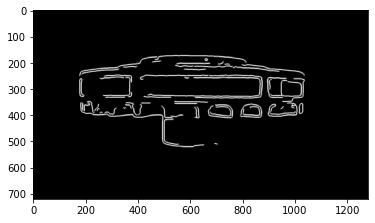

In [5]:
obj_BF = dip.BilateralFilter(obj3, spatialSigmas=2, tonalSigma=5)
print(obj_BF)
obj_BF.Show()

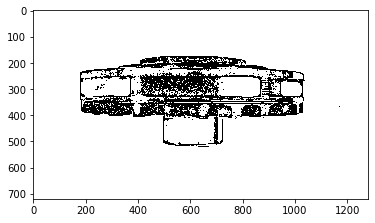

In [57]:
#MThreshold_obj = dip.MultipleThresholds(img(0), thresholds = [225])
#MThreshold_obj.Show()

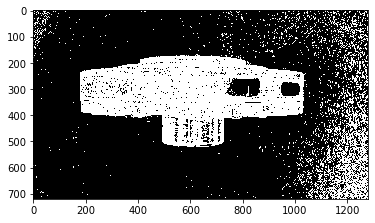

In [79]:
#HThreshold = ~dip.HysteresisThreshold(img(0), lowThreshold = 250, highThreshold = 200)
#HThreshold.Show()

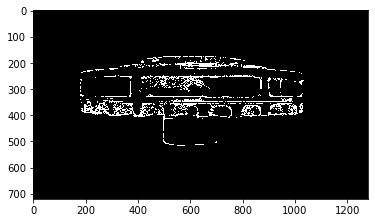

In [104]:
#RTH = dip.RangeThreshold(img(0),  lowerBound = 50, upperBound= 180)
#RTH.Show()

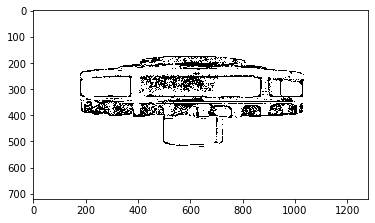

In [114]:
#FTH = dip.FixedThreshold(img(0),threshold=200, foreground = 100.0, background = 10.0)
#FTH.Show()

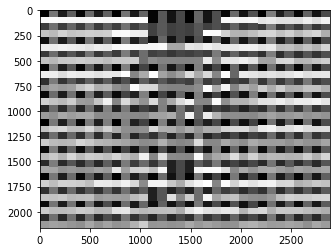

In [145]:
#MVP = dip.MinimumVariancePartitioning(img(0), nClusters = 1000)
#MVP.Show()

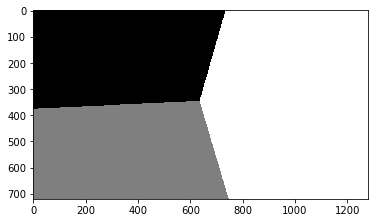

In [6]:
#KMC = dip.KMeansClustering(img(0), 3)
#KMC.Show()

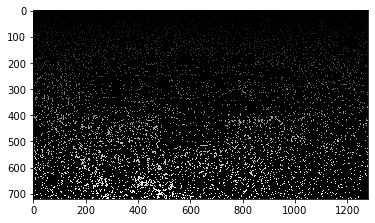

In [20]:
#M = dip.Maxima(img(0), connectivity = 0, output = "labels")
#M.Show()

In [74]:
Threshold_obj = dip.Threshold()[0]
Threshold_obj.Show()

RuntimeError: Data type not supported
in function: Histogram (C:\Users\travis\build\DIPlib\diplib\include\diplib/histogram.h at line number 193)
in function: OtsuThreshold (C:\Users\travis\build\DIPlib\diplib\src\segmentation\threshold.cpp at line number 66)

Scalar image:
    data type UINT32
    sizes {1280, 720} (2D)
    pixel size 0.0556 mm x 0.0556 mm
    strides {1, 1280}, tensor stride 1
    data pointer:   0000019F57A3E040 (shared among 1 images)
    origin pointer: 0000019F57A3E040



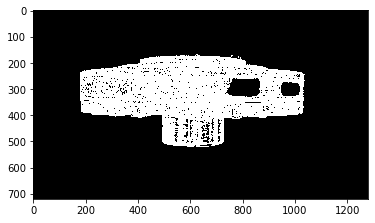

In [84]:
lab = dip.Label(HThreshold,minSize=50000)
print(lab)
lab.Show()

In [85]:
msr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
print(msr)

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      548.1 |      151.3 |      24.30 |      15.59 |      7.711 |      5.475 |     0.7489 |      731.8 | 



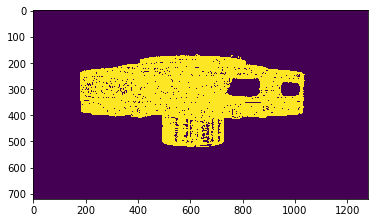

In [86]:
c = dip.ObjectToMeasurement(lab, msr['Solidity']) 
c.Show(colormap='viridis')

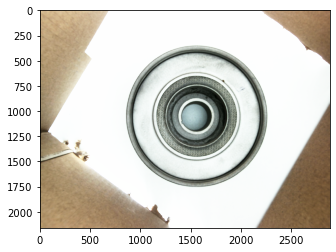

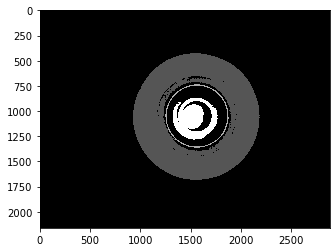

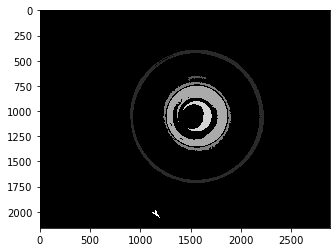

In [294]:
low = 0#0
high = 100#80
img2 = dip.ErfClip( img_BF, low, high, "both" )
img2 = ( img2 - low ) / ( high - low ) 
img2.Show()

hole = img2 > 0.5
hole = dip.BinaryAreaOpening( dip.EdgeObjectsRemove( hole(0) ), 1000 )

holeLabel = dip.Label(hole(0),minSize=400)
holeLabel.Show()
holeMsr = dip.MeasurementTool.Measure( holeLabel, img2, ['Size','Perimeter','Radius','Solidity'] )

washer = img2 <= 0.5 
washer = dip.BinaryAreaOpening( dip.EdgeObjectsRemove( washer(0) ), 1000 )

washerLabel = dip.Label(washer(0),minSize=400)
washerLabel.Show()
washerMsr = dip.MeasurementTool.Measure( washerLabel, img2, ['Size','Perimeter','Radius','Solidity'] )

In [295]:
print(holeMsr)
print(washerMsr)

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (mm²) |       (mm) |       (mm) |       (mm) |       (mm) |       (mm) |            |      (mm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      2001. |      189.4 |      30.25 |      30.08 |      29.66 |    0.07249 |     0.7026 |      2848. | 
2 |      53.42 |      95.05 |      15.25 |      15.04 |      14.92 |    0.04496 |    0.07479 |      714.2 | 
3 |      259.4 |      87.49 |      11.27 |      9.986 |      8.006 |     0.7312 |     0.7666 |      338.4 | 

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | -

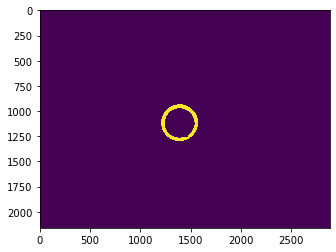

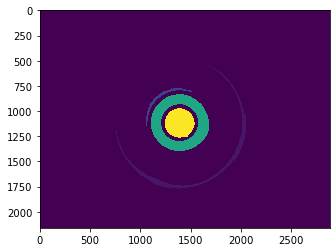

In [254]:
c = dip.ObjectToMeasurement(holeLabel, holeMsr['Solidity'])
c.Show(colormap='viridis')
c = dip.ObjectToMeasurement(washerLabel, washerMsr['Solidity'])
c.Show(colormap='viridis')

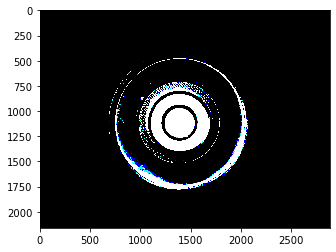

In [13]:
f =  img < 50
f.Show()

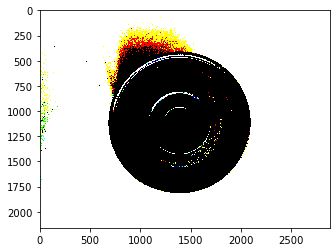

In [12]:
f2 =  img > 150
f2.Show()

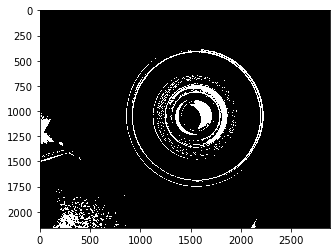

   |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
   |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
   |      (µm²) |       (µm) |       (µm) |       (µm) |       (µm) |       (µm) |            |      (µm²) | 
-- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
 1 |  8.640e+04 |      5311. |      724.9 |      714.9 |      700.2 |      5.423 |    0.05347 |  1.616e+06 | 
 2 |  1.615e+04 |      4811. |      953.2 |      545.4 |      231.4 |      223.6 |    0.01797 |  8.989e+05 | 
 3 |      7641. |      2471. |      522.0 |      285.2 |      83.04 |      129.8 |    0.03477 |  2.198e+05 | 
 4 |      1441. |      362.9 |      75.66 |      38.17 |      3.976 |      21.71 |     0.7391 |      1950. | 
 5 |  1.42

In [62]:
obj = dip.Threshold(dip.Gauss(f(0)))[0]
obj.Show()
lab = dip.Label(obj,minSize=410)
msr_f = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
print(msr_f)

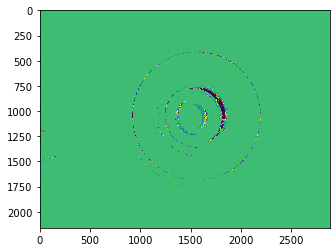

In [63]:
c = dip.ObjectToMeasurement(img(0), msr_f['Solidity'])
c.Show(colormap='viridis')

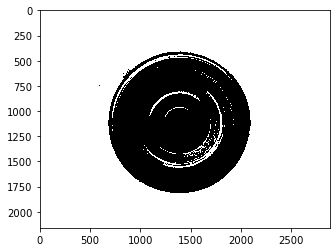

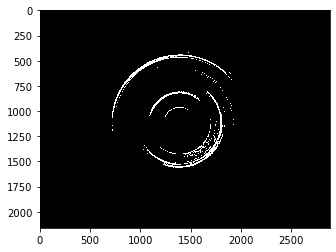

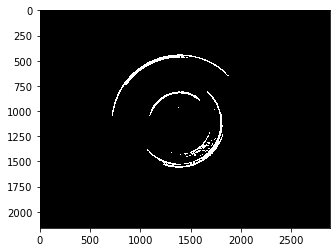

  |       Size |  Perimeter |                                            Radius |   Solidity | ConvexArea | 
- | ---------- | ---------- | ------------------------------------------------- | ---------- | ---------- | 
  |            |            |        Max |       Mean |        Min |     StdDev |            |            | 
  |      (µm²) |       (µm) |       (µm) |       (µm) |       (µm) |       (µm) |            |      (µm²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |  4.061e+04 |      3422. |      761.6 |      398.7 |      80.69 |      197.8 |    0.09743 |  4.168e+05 | 
2 |  1.511e+04 |      1437. |      319.4 |      172.6 |      38.17 |      80.56 |     0.1983 |  7.620e+04 | 
3 |  4.517e+04 |      3726. |      617.4 |      336.8 |      109.7 |      141.2 |     0.1117 |  4.045e+05 | 
4 |      9106. |      1076. |      171.1 |      72.60 |      9.182 |      39.51 |     0.4535 |  2.008e+04 | 
5 |      661.9 |   

"\nobjectArea = msr[1]['Size'][0]\n\nobj = dip.EdgeObjectsRemove(~obj)\nobj.Show()\nlab = dip.Label(obj)\nlab.Show()\nmsr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])\nsz = msr['Size']\nholeAreas = []\nfor ii in sz.Objects():\n    holeAreas.append(sz[ii][0])\n\n# Add hole areas to main object area\nobjectArea += sum(holeAreas)\n\nprint('Object diameter = %f mm' % (2 * math.sqrt(objectArea / math.pi)))\nfor a in holeAreas:\n    print('Hole diameter = %f mm' % (2 * math.sqrt(a / math.pi)))\n"

In [47]:
obj = dip.Threshold(dip.Gauss(img(0)))[0]
obj.Show()
obj = dip.EdgeObjectsRemove(obj)
obj.Show()

obj = dip.Opening(dip.Closing(obj,9),9)
obj.Show()

lab = dip.Label(obj,minSize=400)
msr_f = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
print(msr_f)
'''
objectArea = msr[1]['Size'][0]

obj = dip.EdgeObjectsRemove(~obj)
obj.Show()
lab = dip.Label(obj)
lab.Show()
msr = dip.MeasurementTool.Measure(lab,img,['Size','Perimeter','Radius','Solidity'])
sz = msr['Size']
holeAreas = []
for ii in sz.Objects():
    holeAreas.append(sz[ii][0])

# Add hole areas to main object area
objectArea += sum(holeAreas)

print('Object diameter = %f mm' % (2 * math.sqrt(objectArea / math.pi)))
for a in holeAreas:
    print('Hole diameter = %f mm' % (2 * math.sqrt(a / math.pi)))
'''

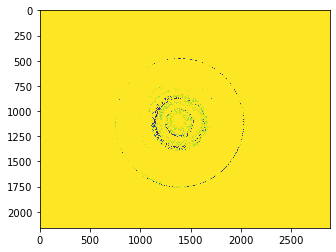

In [46]:
c = dip.ObjectToMeasurement(img(0), msr_f['Solidity'])
c.Show(colormap='viridis')

In [13]:
help(dip)

Help on package diplib:

NAME
    diplib - This module is PyDIP, the Python interface to DIPlib.

DESCRIPTION
    See the User Manual online: https://diplib.org/diplib-docs/pydip_user_manual.html

PACKAGE CONTENTS
    PyDIP_bin
    PyDIP_py
    PyDIPjavaio
    PyDIPviewer
    __main__
    loadjvm

SUBMODULES
    ColorSpaceManager
    MeasurementTool
    javaio
    viewer

FUNCTIONS
    Abs(...) method of builtins.PyCapsule instance
        Abs(in: diplib.PyDIP_bin.Image) -> diplib.PyDIP_bin.Image
    
    Accuracy(...) method of builtins.PyCapsule instance
        Accuracy(in: diplib.PyDIP_bin.Image, reference: diplib.PyDIP_bin.Image) -> float
    
    Acos(...) method of builtins.PyCapsule instance
        Acos(in: diplib.PyDIP_bin.Image) -> diplib.PyDIP_bin.Image
    
    AdaptiveBanana(...) method of builtins.PyCapsule instance
        AdaptiveBanana(in: diplib.PyDIP_bin.Image, params: List[diplib.PyDIP_bin.Image], sigmas: List[float] = [5.0, 1.0], orders: List[int] = [0], truncatio

In [52]:
dip.MeasurementTool.Features()

[('Size', 'Number of object pixels'),
 ('Minimum', 'Minimum coordinates of the object'),
 ('Maximum', 'Maximum coordinates of the object'),
 ('CartesianBox', 'Cartesian box size of the object in all dimensions'),
 ('Perimeter', 'Length of the object perimeter  (chain-code method, 2D)'),
 ('SurfaceArea', 'surface area of object (3D)'),
 ('Feret', 'Maximum and minimum object diameters (2D)'),
 ('SolidArea', 'Area of object with any holes filled (2D)'),
 ('ConvexArea', 'Area of the convex hull (2D)'),
 ('ConvexPerimeter', 'Perimeter of the convex hull (2D)'),
 ('AspectRatioFeret', 'Feret-based aspect ratio (2D)'),
 ('Radius', 'Statistics on radius of object (2D)'),
 ('P2A', 'Perimeter to area ratio of the object (2D & 3D)'),
 ('Roundness', 'Roundness of the object (2D)'),
 ('Circularity', 'Circularity of the object (2D)'),
 ('PodczeckShapes', 'Podczeck shape descriptors (2D)'),
 ('Solidity', 'Area fraction of convex hull covered by object (2D)'),
 ('Convexity',
  'Ratio of perimeter of co

Color image (3x1 column vector, 3 elements, sRGB):
    data type UINT8
    sizes {961, 1280} (2D)
    pixel size 0.000352778 m x 0.000352778 m
    strides {3, 2883}, tensor stride 1
    data pointer:   000002B2396DE040 (shared among 1 images)
    origin pointer: 000002B2396DE040

Color image (3x1 column vector, 3 elements, sRGB):
    data type UINT8
    sizes {51, 1280} (2D)
    pixel size 0.000352778 m x 0.000352778 m
    strides {3, 2883}, tensor stride 1
    data pointer:   000002B2396DE040 (shared among 2 images)
    origin pointer: 000002B2396DE0D6

Scalar image:
    data type UINT8
    sizes {961, 1280} (2D)
    pixel size 0.000352778 m x 0.000352778 m
    strides {3, 2883}, tensor stride 1
    data pointer:   000002B2396DE040 (shared among 2 images)
    origin pointer: 000002B2396DE040

[217, 219, 218]
217
[217]


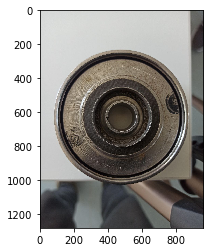

In [11]:
a = dip.ImageRead('test.jpg')
print(a)
print(a[50:100, :])       # spatial indexing is the same as for other 2D images!
print(a(0))               # this is the red channel
print(a[128, 45])         # this returns a Python list with all the values for the pixel
print(a[128, 45][0])      # this returns the red value of one pixel
print(a(0)[128, 45])      # this also, but as a Python list
a.Show()

sRGB
Lab


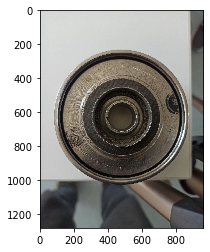

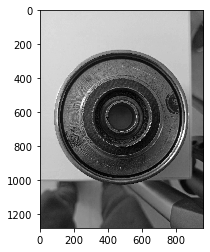

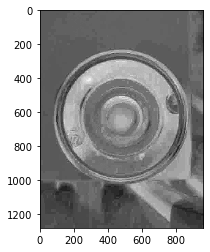

In [12]:
print(a.ColorSpace())
b = dip.ColorSpaceManager.Convert(a, 'Lab')
print(b.ColorSpace())
b.Show()
a(2).Show()
b(2).Show()

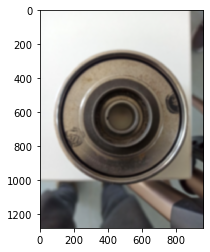

In [13]:
dip.Gauss(a, 5).Show()

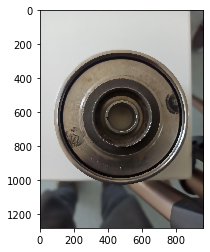

In [14]:
b = dip.BilateralFilter(a, spatialSigmas=5, tonalSigma=30)
b.Show()

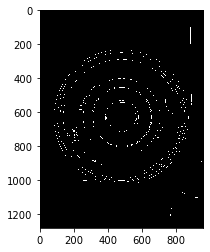

In [15]:
b = dip.ColorSpaceManager.Convert(b, 'gray')
dip.Canny(b, upper=0.99).Show()

{0.07467 mm}


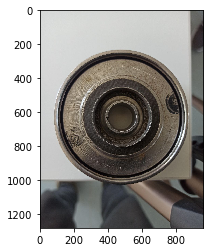

In [21]:
a = dip.ImageRead('test.jpg')
#a.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1, "um")))
a.SetPixelSize(dip.PixelSize(0.07467 * dip.Units("mm")))
print(a.PixelSize())
a.Show()

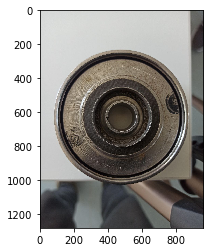

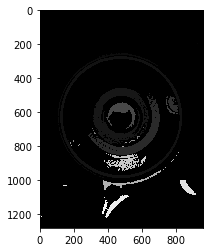

In [44]:
b = a < 50
b = dip.EdgeObjectsRemove(b(0))
b = dip.Label(b, minSize=30)
a.Show()
b.Show()

In [45]:
m = dip.MeasurementTool.Measure(b(0), a(0), ['Size', 'Solidity', 'Statistics'])
print(m)

   |       Size |   Solidity |                                            Statistics | ConvexArea | 
-- | ---------- | ---------- | ----------------------------------------------------- | ---------- | 
   |            |            |       Mean |     StdDev |   Skewness | ExcessKurtosis |            | 
   |      (mm²) |            |            |            |            |                |      (mm²) | 
-- | ---------- | ---------- | ---------- | ---------- | ---------- | -------------- | ---------- | 
 1 |     0.2174 |     0.5778 |      48.92 |     0.2700 |     -3.304 |          9.395 |     0.3764 | 
 2 |      46.60 |    0.03075 |      41.01 |      5.036 |    -0.3591 |       -0.05649 |      1515. | 
 3 |      190.1 |    0.08461 |      19.95 |      10.18 |      1.014 |         0.4370 |      2247. | 
 4 |      204.7 |     0.4320 |      30.54 |      9.993 |   -0.02458 |        -0.9199 |      473.9 | 
 5 |     0.4293 |     0.3438 |      46.05 |      2.635 |     -1.068 |         0.7054 |     

In [20]:
print(m['Statistics'][30])
print(m['Statistics'][30][2])
print(m[30]['Statistics'][2])

[32.84313725490195, 2.781169171550758, -1.027464500312585, 0.4751908040174287]
-1.027464500312585
-1.027464500312585
